In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
plt.style.use("seaborn-whitegrid")

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.drop(["car_ID","CarName"],axis=1,inplace=True)

In [ ]:
df.isna().sum()
df.nunique()

symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

**MUTUAL** **INFORMATION**
>Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other.

In [ ]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname],a= X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [ ]:
discrete_features
X.head()
#y.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,0,0,0,0,0,0,88.6,168.8,64.1,...,0,130,0,3.47,2.68,9.0,111,5000,21,27
1,3,0,0,0,0,0,0,88.6,168.8,64.1,...,0,130,0,3.47,2.68,9.0,111,5000,21,27
2,1,0,0,0,1,0,0,94.5,171.2,65.5,...,1,152,0,2.68,3.47,9.0,154,5000,19,26
3,2,0,0,1,2,1,0,99.8,176.6,66.2,...,0,109,0,3.19,3.40,10.0,102,5500,24,30
4,2,0,0,1,2,2,0,99.4,176.6,66.4,...,2,136,0,3.19,3.40,8.0,115,5500,18,22


Scikit-learn has two mutual information metrics in its feature_selection module: one for real-valued targets (mutual_info_regression) and one for categorical targets (mutual_info_classif).

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def mi_score(X,y,discrete_features):
  mi_scores = mutual_info_regression(X,y,discrete_features = discrete_features)
  mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
  #mi_scores = mi_scores.sort(ascending=False)
  return mi_scores

mi_score = mi_score(X,y,discrete_features)
mi_score

symboling           0.210063
fueltype            0.035909
aspiration          0.096986
doornumber          0.000000
carbody             0.048771
drivewheel          0.332292
enginelocation      0.039466
wheelbase           0.580992
carlength           0.554225
carwidth            0.654234
carheight           0.340594
curbweight          1.349955
enginetype          0.167012
cylindernumber      0.344232
enginesize          0.978725
fuelsystem          0.483731
boreratio           0.463249
stroke              0.366261
compressionratio    0.167628
horsepower          1.248215
peakrpm             0.398096
citympg             0.810254
highwaympg          0.935283
Name: MI Scores, dtype: float64

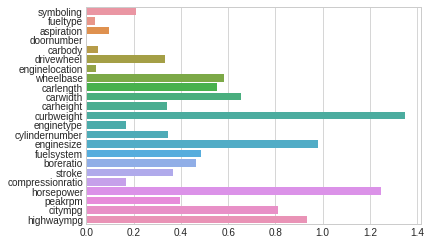

In [ ]:
xindex = mi_score.index
sb.barplot(y=xindex,x=mi_score.values)

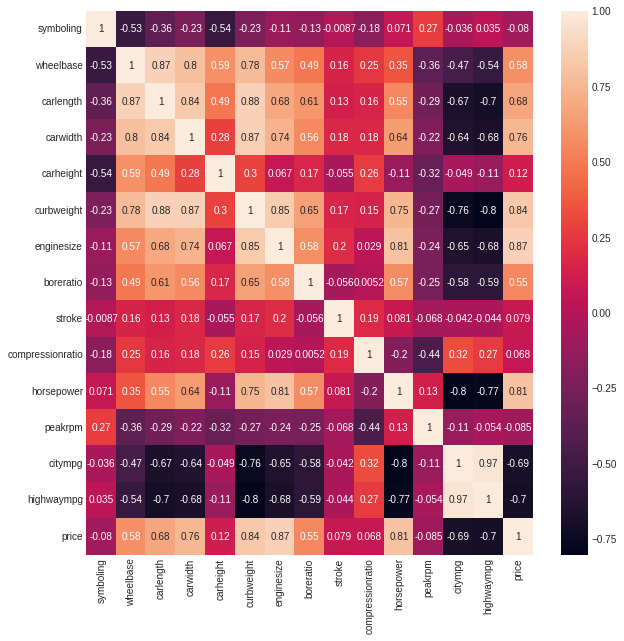

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),annot=True)

**CREATING FEATURES**

**UNSUPERVISED**
> Unsupervised algorithms don't make use of a target; instead, their purpose is to learn some property of the data, to represent the structure of the features in a certain way. In the context of feature engineering for prediction, you could think of an unsupervised algorithm as a "feature discovery" technique.

**K-MEANS CLUSTERING**
>Clustering simply means the assigning of data points to groups based upon how similar the points are to each other. 

In [ ]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
X = df[['compressionratio','horsepower','peakrpm']]
X.head()

,compressionratio,horsepower,peakrpm
0,9.0,111,5000
1,9.0,111,5000
2,9.0,154,5000
3,10.0,102,5500
4,8.0,115,5500


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
X["cluster"] = km.fit_predict(X)
X["cluster"] = X["cluster"].astype("category")
X.head()

In [ ]:
sb.relplot(x="horsepower",y="peakrpm",hue="cluster",data=X)

In [ ]:
X["enginesize"] = df["enginesize"]
sb.catplot(x="enginesize", y="cluster", data=X, kind="boxen", height=6);

In [ ]:
X["price"] = df.price
features=["enginesize","compressionratio","horsepower","peakrpm"]
sb.relplot(
    x="value", y="price", hue="cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=X.melt(
        value_vars=features, id_vars=["price", "cluster"],
    ),
);

In [ ]:
#features = df.select_dtypes(include=np.number).columns.tolist()
X = df.select_dtypes(include=np.number)
Y= X.pop("price")

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

xgb = XGBRegressor()
score = cross_val_score(xgb,X,Y,cv=5,scoring="neg_mean_squared_log_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

[10:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.2264428805768

**PRINCIPAL COMPONENT ANALYSIS**

**>Dimensionality reduction:** When your features are highly redundant (multicollinear, specifically), PCA will partition out the redundancy into one or more near-zero variance components, which you can then drop since they will contain little or no information.

**>Anomaly detection**: Unusual variation, not apparent from the original features, will often show up in the low-variance components. These components could be highly informative in an anomaly or outlier detection task.

**>Noise reduction:** A collection of sensor readings will often share some common background noise. PCA can sometimes collect the (informative) signal into a smaller number of features while leaving the noise alone, thus boosting the signal-to-noise ratio.

**>Decorrelation:** Some ML algorithms struggle with highly-correlated features. PCA transforms correlated features into uncorrelated components, which could be easier for your algorithm to work with.

>PCA only works with numeric features, like continuous quantities or counts.

>PCA is sensitive to scale. It's good practice to standardize your data before applying PCA, unless you know you have good reason not to.

>Consider removing or constraining outliers, since they can have an undue influence on the results.

In [ ]:
X = df.select_dtypes(include = np.number)
Y = X.pop("price")
X.head()

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

preprocessing = Pipeline(steps=[('scaler', StandardScaler()),('pca', PCA())])
Xp = pd.DataFrame(preprocessing.fit_transform(X))
Xp
X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


**TARGET ENCODING :** -->For categorical data

> It's a method of encoding categories as numbers, like one-hot or label encoding, with the difference that it also uses the target to create the encoding.

**>A target encoding is any kind of encoding that replaces a feature's categories with some number derived from the target.**

>USE CASES:

>High-cardinality features: A feature with a large number of categories can be troublesome to encode: a one-hot encoding would generate too many features and alternatives, like a label encoding, might not be appropriate for that feature. A target encoding derives numbers for the categories using the feature's most important property: its relationship with the target.

>Domain-motivated features: From prior experience, you might suspect that a categorical feature should be important even if it scored poorly with a feature metric. A target encoding can help reveal a feature's true informativeness.

In [ ]:
X = df.copy()
y = X.pop("price")
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df["encoded_fueltype"] = df.groupby("fueltype")["price"].transform("mean") # uses price as target 
df[["fueltype","price","encoded_fueltype"]].head(10)

,fueltype,price,encoded_fueltype
0,gas,13495.000,12999.7982
1,gas,16500.000,12999.7982
2,gas,16500.000,12999.7982
3,gas,13950.000,12999.7982
4,gas,17450.000,12999.7982
5,gas,15250.000,12999.7982
6,gas,17710.000,12999.7982
7,gas,18920.000,12999.7982
8,gas,23875.000,12999.7982
9,gas,17859.167,12999.7982
